In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('voice.csv')

In [3]:
data.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


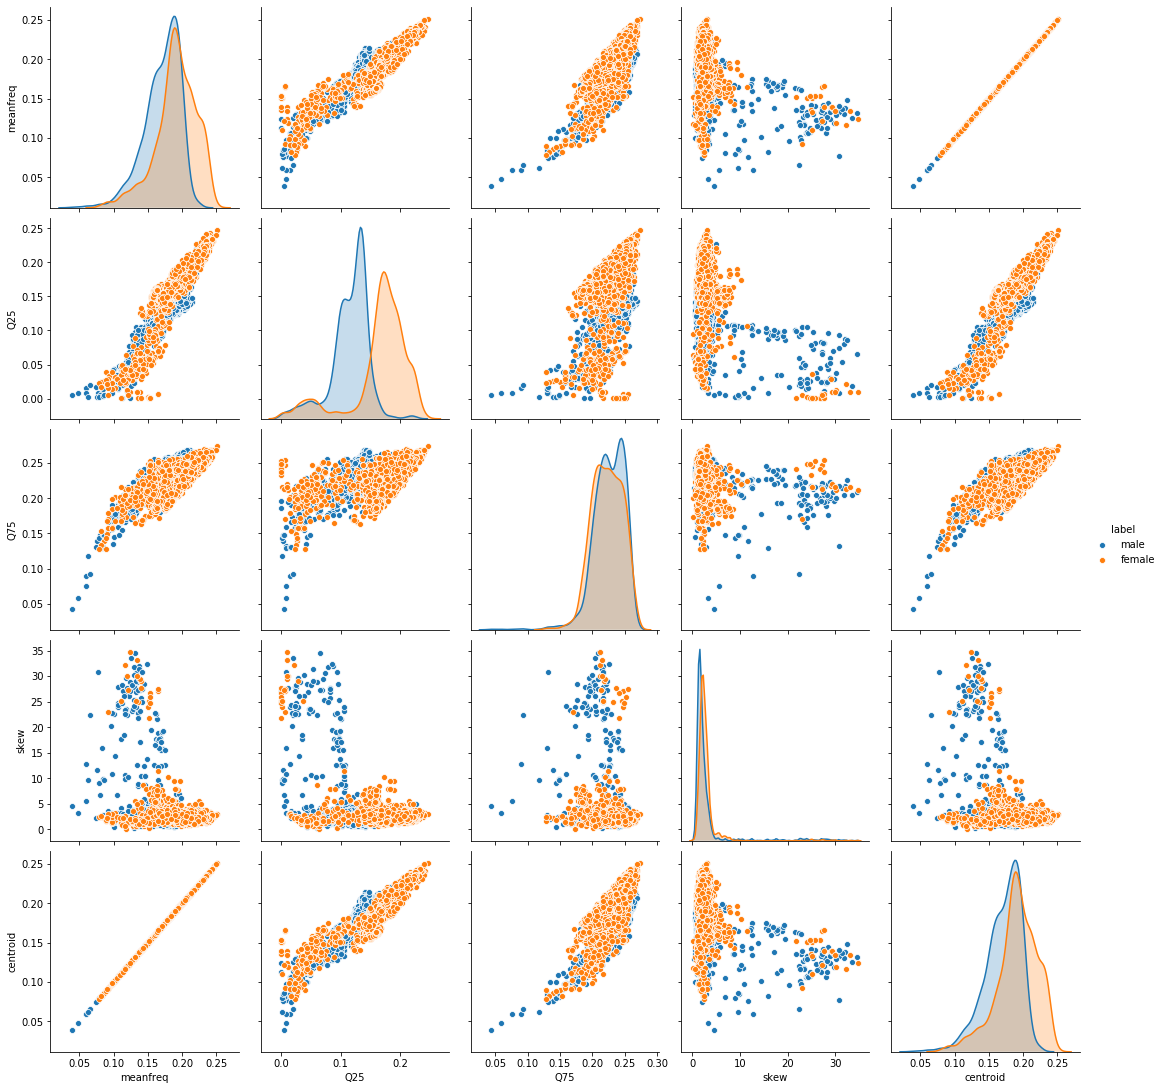

In [4]:
sns.pairplot(data[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']],hue='label', height=3)

In [5]:
correlation = data.corr()
print(correlation)

          meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.53

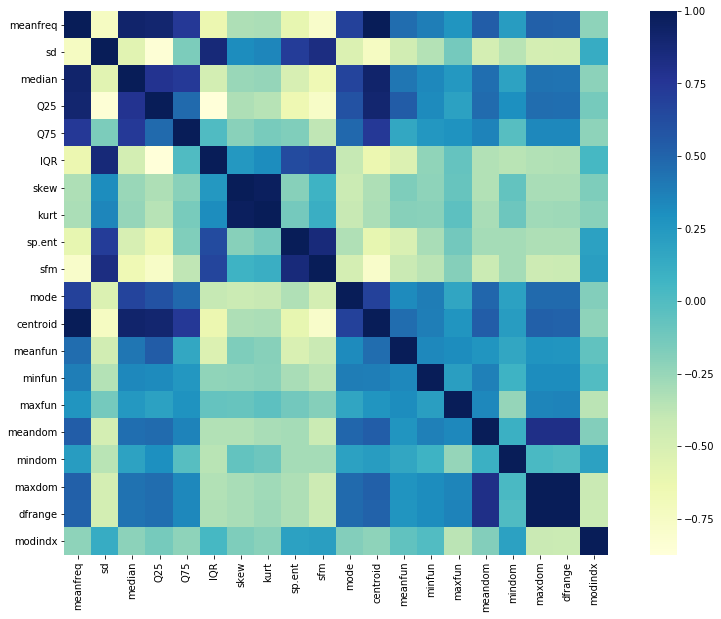

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation,square=True,cmap='YlGnBu')

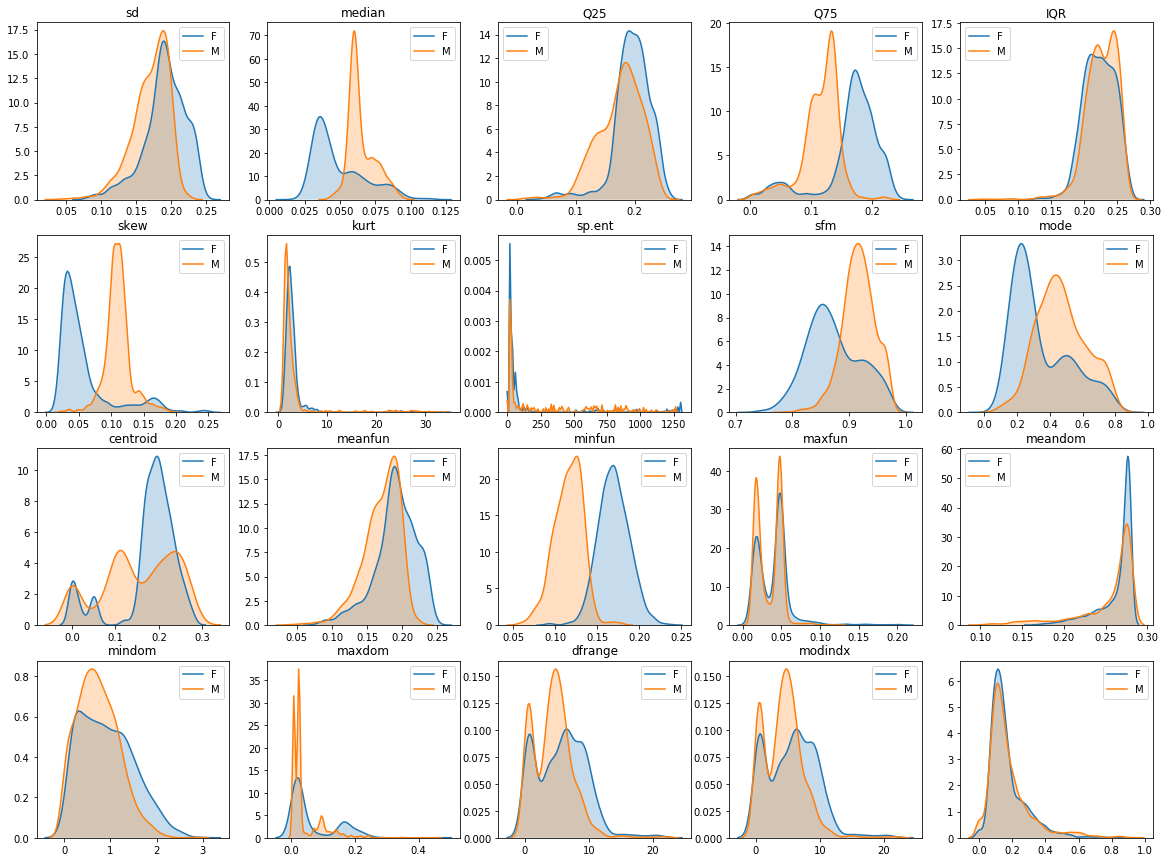

In [83]:
male = data.loc[data.label=='male']
female = data.loc[data.label=='female']

plt.subplots(4,5,figsize=(20,15))
for i in range(1,21):
    plt.title(data.columns[i-1])
    plt.subplot(4,5,i)
    sns.kdeplot(female.loc[female['label'] == 'female', female.columns[i-1]], shade=True,shade_lowest=False, label='F')
    sns.kdeplot(male.loc[male['label'] == 'male', male.columns[i-1]], shade=True,shade_lowest=False,label='M')

In [10]:
X = np.array(data.drop(['label'],1))
y = np.array(data['label'])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
print('Accuracy1 :',model.score(X_train,y_train))
print('Accuracy2 :',model.score(X_test,y_test))

Accuracy1 : 0.8822733423545331
Accuracy2 : 0.8538380651945321


In [15]:
def select_kbest_clf(data_frame, target, k=5):
    """
    Selecting K-Best features for classification
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

In [17]:
k = select_kbest_clf(data,'label',k = 5).sort_values(['F Score'],ascending=False)

In [18]:
k

,F Score,P Value,Support,Attribute
12,7228.790362,0.000000e+00,True,meanfun
5,1965.750000,0.000000e+00,True,IQR
3,1121.569224,9.140832e-211,True,Q25
8,1003.308717,1.614016e-191,True,sp.ent
1,945.461376,6.654756e-182,True,sd
9,463.923194,3.877715e-96,False,sfm
0,406.752820,3.368951e-85,False,meanfreq
11,406.752820,3.368951e-85,False,centroid
2,277.588158,8.259210e-60,False,median
17,126.024161,1.050986e-28,False,maxdom


Text(0.5, 1.0, 'Feature Importance')

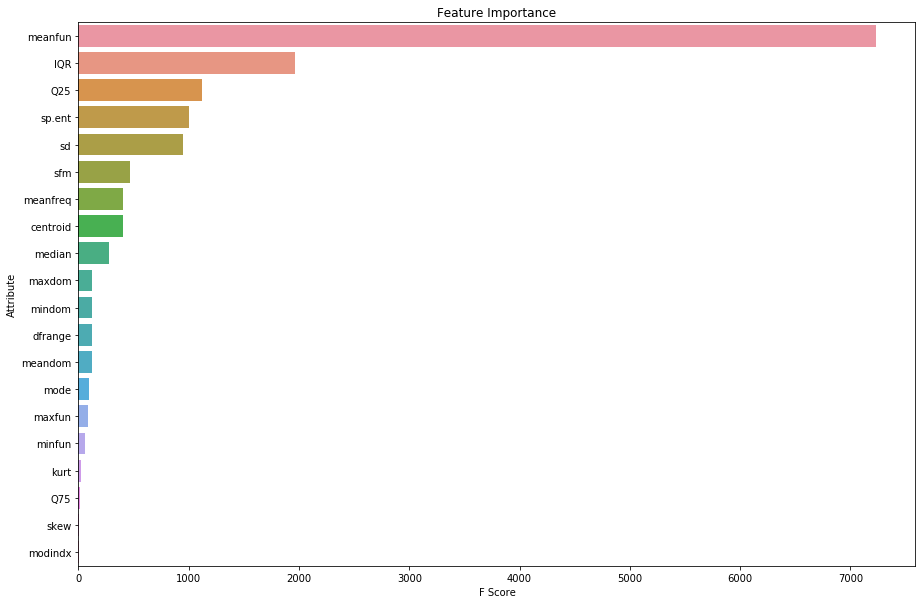

In [20]:
plt.figure(figsize=(15, 10))
k1=sns.barplot(x=k['F Score'],y=k['Attribute'])
k1.set_title('Feature Importance')

In [23]:
new_data = data[['meanfun','IQR','Q25','sp.ent','label']]
X = X = np.array(new_data.drop(['label'],1))
y = np.array(new_data['label'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [24]:
model.fit(X_train,y_train)
print('Accuracy1 :',model.score(X_train,y_train))
print('Accuracy2 :',model.score(X_test,y_test))

Accuracy1 : 0.959404600811908
Accuracy2 : 0.9600420609884333
